<a href="https://colab.research.google.com/github/annvorosh/GB/blob/NNetwork/NN_L02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist         # библиотека базы выборок Fashion_Mnist

# Each training and test example is assigned to one of the following labels:
# 0 T-shirt/top
# 1 Trouser
# 2 Pullover
# 3 Dress
# 4 Coat
# 5 Sandal
# 6 Shirt
# 7 Sneaker
# 8 Bag
# 9 Ankle boot

from tensorflow import keras
from keras.layers import Dense, Flatten

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data() # x - изображения, y - номер категории предмета гардероба

In [2]:
x_train.min(), x_train.max() # картинки представлены в градациях серого, 0 - черный, 255 - белый

(0, 255)

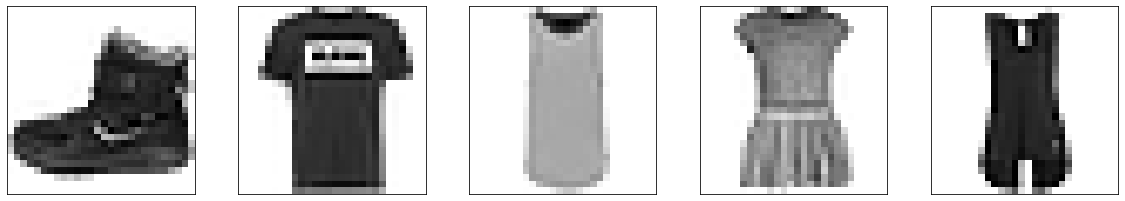

In [3]:
# стандартизация входных данных (для получения значений от 0 до 1)
x_train = x_train / 255
x_test = x_test / 255

# преобразование выходных значений в векторы по категориям, например [0,0,1,0,0,0,0,0,0,0]
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

# отображение первых 5 изображений из обучающей выборки
plt.figure(figsize=(20,20))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)

plt.show()

In [4]:
# полносвязная нейронная сеть
model = keras.Sequential([               
    Flatten(input_shape=(28, 28, 1)),   # входной слой 784 нейрона (28 * 28)
    Dense(128, activation='relu'), # Dense - полносвязный класс
    Dense(64, activation='relu'),
    Dense(10, activation='softmax') # хорошо подходит для залач классификации, 10 - количество категорий предметов гардероба
])

print(model.summary())      # вывод структуры НС в консоль



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________
None


Увеличение количества слоев улучшает качество сети.

In [5]:
# создадим свой оптимайзер
# MyAdam = keras.optimizers.Adam(learning_rate = 0.0001)

# протестируем сеть с разными оптимизаторами
optimizers = ['Adam', 'SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adamax', 'Nadam']

In [6]:
for i in optimizers:
  print(f'\n{i}')
  model.compile(optimizer = i,
             loss='categorical_crossentropy', # хорошо подходит для залач классификации
             metrics=['accuracy'])

  # запускаем процесс обучения
  model.fit(x_train, y_train_cat, batch_size=30, epochs=3, validation_split=0.2)
  # после каждых batch_size изображений корректируются весовые коэффициенты



Adam
Epoch 1/3
1600/1600 [==============================] - 16s 9ms/step - loss: 0.5104 - accuracy: 0.8189 - val_loss: 0.4150 - val_accuracy: 0.8465
Epoch 2/3
1600/1600 [==============================] - 10s 6ms/step - loss: 0.3757 - accuracy: 0.8631 - val_loss: 0.3656 - val_accuracy: 0.8683
Epoch 3/3
1600/1600 [==============================] - 8s 5ms/step - loss: 0.3416 - accuracy: 0.8748 - val_loss: 0.3449 - val_accuracy: 0.8766

SGD
Epoch 1/3
1600/1600 [==============================] - 5s 3ms/step - loss: 0.2803 - accuracy: 0.8960 - val_loss: 0.3224 - val_accuracy: 0.8832
Epoch 2/3
1600/1600 [==============================] - 6s 3ms/step - loss: 0.2716 - accuracy: 0.8995 - val_loss: 0.3175 - val_accuracy: 0.8863
Epoch 3/3
1600/1600 [==============================] - 5s 3ms/step - loss: 0.2667 - accuracy: 0.9008 - val_loss: 0.3179 - val_accuracy: 0.8857

RMSprop
Epoch 1/3
1600/1600 [==============================] - 7s 4ms/step - loss: 0.3173 - accuracy: 0.8827 - val_loss: 0.3854 

Выбрали более удачный оптимизатор, основываясь на результатах точности сети по валидационным значениям

In [7]:
model.compile(optimizer = 'Adamax',
             loss='categorical_crossentropy', # хорошо подходит для залач классификации
             metrics=['accuracy'])

  # запускаем процесс обучения
model.fit(x_train, y_train_cat, batch_size=30, epochs=10, validation_split=0.2)
  # после каждых batch_size изображений корректируются весовые коэффициенты

Epoch 1/10
1600/1600 [==============================] - 7s 4ms/step - loss: 0.2002 - accuracy: 0.9243 - val_loss: 0.3128 - val_accuracy: 0.8956
Epoch 2/10
1600/1600 [==============================] - 7s 5ms/step - loss: 0.1899 - accuracy: 0.9278 - val_loss: 0.3128 - val_accuracy: 0.8930
Epoch 3/10
1600/1600 [==============================] - 7s 4ms/step - loss: 0.1853 - accuracy: 0.9317 - val_loss: 0.3129 - val_accuracy: 0.8949
Epoch 4/10
1600/1600 [==============================] - 7s 4ms/step - loss: 0.1802 - accuracy: 0.9324 - val_loss: 0.3263 - val_accuracy: 0.8943
Epoch 5/10
1600/1600 [==============================] - 8s 5ms/step - loss: 0.1771 - accuracy: 0.9335 - val_loss: 0.3149 - val_accuracy: 0.8963
Epoch 6/10
1600/1600 [==============================] - 7s 4ms/step - loss: 0.1730 - accuracy: 0.9355 - val_loss: 0.3187 - val_accuracy: 0.8966
Epoch 7/10
1600/1600 [==============================] - 8s 5ms/step - loss: 0.1705 - accuracy: 0.9365 - val_loss: 0.3182 - val_accuracy:

При уменьшении значения batch size точность сети возрастает, но увеличивается время При увеличении количества эпох точность так же возрастает, время тоже растет.


Тестовая выборка: 
1/1 [==============================] - 0s 101ms/step
[[4.87579378e-13 1.00000000e+00 1.35588104e-14 3.06447714e-11
  5.62550494e-14 3.71557248e-18 1.05947065e-12 4.84683601e-17
  1.15021992e-16 1.21181753e-19]]
Распознанная цифра: 1 - Trouser


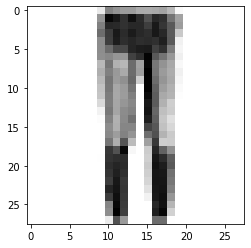

In [8]:
print('\nТестовая выборка: ')


model.evaluate(x_test, y_test_cat)


# Пример
n = 3
x = np.expand_dims(x_test[n], axis=0)
res = model.predict(x)
print( res )

if np.argmax(res) == 0:
  print(f"Распознанная цифра: {np.argmax(res)} - T-shirt/top")
elif np.argmax(res) == 1:
  print(f"Распознанная цифра: {np.argmax(res)} - Trouser")
elif np.argmax(res) == 2:
  print(f"Распознанная цифра: {np.argmax(res)} - Pullover")
elif np.argmax(res) == 3:
  print(f"Распознанная цифра: {np.argmax(res)} - Dress")
elif np.argmax(res) == 4:
  print(f"Распознанная цифра: {np.argmax(res)} - Coat")
elif np.argmax(res) == 5:
  print(f"Распознанная цифра: {np.argmax(res)} - Sandal")
elif np.argmax(res) == 6:
  print(f"Распознанная цифра: {np.argmax(res)} - Shirt")
elif np.argmax(res) == 7:
  print(f"Распознанная цифра: {np.argmax(res)} - Sneaker")
elif np.argmax(res) == 8:
  print(f"Распознанная цифра: {np.argmax(res)} - Bag")
elif np.argmax(res) == 9:
  print(f"Распознанная цифра: {np.argmax(res)} - Ankle boot")

plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()

In [9]:
# Распознавание всей тестовой выборки
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)

print(pred.shape)

print(pred[:30])
print(y_test[:30])

313/313 [==============================] - 1s 2ms/step
(10000,)
[9 2 1 1 0 1 4 6 5 7 4 5 7 3 4 1 2 2 8 0 2 5 7 5 1 2 6 0 9 3]
[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3]


In [10]:
# Выделение неверных вариантов
mask = pred == y_test
print(mask[:10])

x_false = x_test[~mask]
p_false = pred[~mask]

print(x_false.shape)


[ True  True  True  True False  True  True  True  True  True]
(1090, 28, 28)


 Значение сети: 0 - T-shirt/top


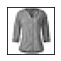

 Значение сети: 2 - Pullover


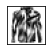

Значение сети: 5 - Sandal


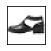

 Значение сети: 2 - Pullover


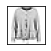

 Значение сети: 0 - T-shirt/top


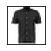

In [11]:
# Вывод первых 25 неверных результатов
plt.figure(figsize=(10,5))
for i in range(5):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])

  if p_false[i] == 0:
    print(f" Значение сети: {p_false[i]} - T-shirt/top")
  elif p_false[i] == 1:
      print(f"Значение сети: {p_false[i]} - Trouser")
  elif p_false[i] == 2:
      print(f" Значение сети: {p_false[i]} - Pullover")
  elif p_false[i] == 3:
      print(f" Значение сети: {p_false[i]} - Dress")
  elif p_false[i] == 4:
      print(f"Значение сети: {p_false[i]} - Coat")
  elif p_false[i] == 5:
      print(f"Значение сети: {p_false[i]} - Sandal")
  elif p_false[i] == 6:
      print(f"Значение сети: {p_false[i]} - Shirt")
  elif p_false[i] == 7:
      print(f"Значение сети: {p_false[i]} - Sneaker")
  elif p_false[i] == 8:
      print(f"Значение сети: {p_false[i]} - Bag")
  elif p_false[i] == 9:
      print(f"Значение сети: {p_false[i]} - Ankle boot")
  plt.imshow(x_false[i], cmap=plt.cm.binary)
  plt.show()

# Новый раздел